<a href="https://colab.research.google.com/github/vaghasiatirth24/Machine-Learning/blob/main/ML_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [525]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import time
import math

sns.set()
import numpy as np
from collections import defaultdict

from numpy import dot
from numpy.linalg import norm

In [526]:
def lineToTuple(line):
    cleanLine = line.strip()
    cleanLine = cleanLine.replace('"', '')
    lineList = cleanLine.split(",")
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

In [527]:
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])


In [528]:
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True

In [529]:
data = [
    [3, 5],
    [3, 4],
    [2, 8],
    [2, 3],
    [6, 2],
    [6, 4],
    [7, 3],
    [7, 4],
    [8, 5],
    [7, 6]
]

In [530]:
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0]
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

In [531]:
def euclidean_distance(a, b):
    distance = 0
    for a,b in zip(a,b):
        distance += pow((a-b), 2)
    return math.sqrt(distance)

In [532]:
def manhattan_distance(a,b):
    distance = 0
    for a,b in zip(a,b):
        distance += abs(a-b)
    return distance

In [533]:
def cosine(a,b):
  A = np.array(a)
  B = np.array(b)
  dist = 1 - np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
  return dist

In [534]:
def jaccard(A, B):
    return 1 - (np.sum(np.minimum(A,B), axis = 0)/np.sum(np.maximum(A, B), axis = 0)) 

In [535]:
def calculate_centroid(cluster):
  n = len(cluster[0])
  if isinstance(cluster[0][-1], str):
    centroid = [0]*(n-1)

    for i in range(n-1):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)
  else:
    centroid = [0]*n

    for i in range(n):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)

  
  return centroid

In [536]:
import itertools
def scatter(clusters, centroid_centers):
  colors = itertools.cycle(["r", "y","m"])
  for key in clusters:
    x = []
    y = []
    cluster = clusters[key]
    for c in cluster:
      x.append(c[0])
      y.append(c[1])
    plt.scatter(x, y, marker='o',color=next(colors))

  for point in centroid_centers:
    plt.scatter(point[0], point[1], marker='+',color='black')
  
  plt.show()

In [537]:
def label_cluster(cluster):
  cl = defaultdict(int)
  for point in cluster:
    cl[point[-1]] += 1
  return cl

In [538]:
class KMeans:
  def __init__(self, n_clusters=3, max_iters=300, init_centroids=None, d_func=euclidean_distance, show_sse=False, show_first_centroid=False, centroid_stop=True):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.init_centroids = init_centroids
    self.d_func = d_func
    self.sse_list = []
    self.show_first_centroid = show_first_centroid
    self.show_sse = show_sse
    self.centroid_stop = centroid_stop

  def fit(self, data):
    start = time.time()
    if self.init_centroids is None:
      random_choice = np.random.choice(range(len(data)), self.n_clusters, replace=False)
      centroids = []

      for choice in random_choice:
        if isinstance(data[choice][-1], str):
          centroids.append(data[choice][:-1])
        else:
          centroids.append(data[choice])
      
      self.init_centroids = centroids
    
    for loop in range(self.max_iters): 
      clusters = defaultdict(list)
      sse = 0


      for point in data:
        temp_centroid = -1
        min_dist = 99999999
        for i, centroid in enumerate(self.init_centroids):
          if isinstance(point[-1], str):
            d = self.d_func(point[:-1], centroid)
          else:
            d = self.d_func(point, centroid)
          if d < min_dist:
            temp_centroid = i
            min_dist = d
        
        clusters[temp_centroid].append(point)

      prev_centroids = self.init_centroids.copy()
      for key in clusters.keys():
        cluster = clusters[key]
        self.init_centroids[key] = calculate_centroid(cluster)

      if loop == 1 and self.show_first_centroid == True:
        print("Centroids after first iteration: ", self.init_centroids)

      if self.centroid_stop == True and self.init_centroids == prev_centroids:
        break

      for key in clusters.keys():
        cluster = clusters[key]
        ce = self.init_centroids[key]

        for p in cluster:
          sse += euclidean_distance(ce, p)

      if self.show_sse == True and loop > 1 and self.sse_list[-1] <= sse:
        self.sse_list.pop()
        break

      self.sse_list.append(sse)

    print("Time taken:", time.time() - start)
    print("Number of iterations:", loop)
    return [self.init_centroids, clusters]


Task 1: Question 1

Centroids after first iteration:  [[4.0, 6.333333333333333], [5.571428571428571, 3.5714285714285716]]
Time taken: 0.0002529621124267578
Number of iterations: 1
Final Cluster 1 : [[3, 5], [2, 8], [7, 6]]
Final Cluster 2 : [[3, 4], [2, 3], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5]]


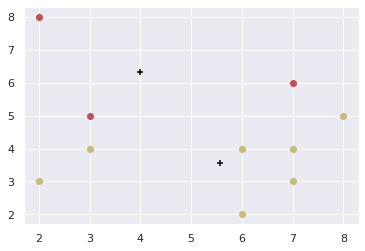

In [539]:
kmeans = KMeans(n_clusters=2, init_centroids=[[4, 6],[5, 4]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

scatter(clusters, centroid_centers)

Task 1: Question 2

Centroids after first iteration:  [[2.5, 5.0], [6.833333333333333, 4.0]]
Time taken: 0.00038051605224609375
Number of iterations: 2
Final Cluster 1 : [[3, 5], [3, 4], [2, 8], [2, 3]]
Final Cluster 2 : [[6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]


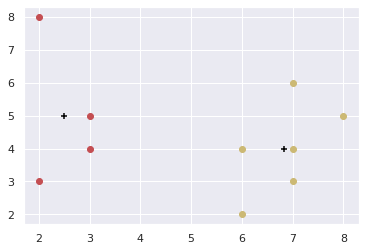

[19.699965039247633, 14.444951661105069]


In [540]:
kmeans = KMeans(n_clusters=2, init_centroids=[[4, 6],[5, 4]], d_func=euclidean_distance,show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

scatter(clusters, centroid_centers)
print(kmeans.sse_list)

 Task 1: Question 3

Centroids after first iteration:  [[2.5, 5.0], [6.833333333333333, 4.0]]
Time taken: 0.0014140605926513672
Number of iterations: 1
Final Cluster 1 : [[3, 5], [3, 4], [2, 8], [2, 3]]
Final Cluster 2 : [[6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]


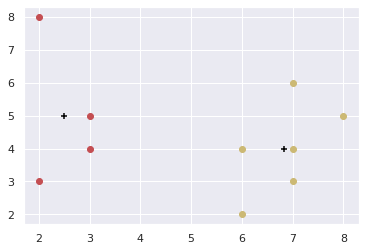

In [541]:
kmeans = KMeans(n_clusters=2, init_centroids=[[3, 3], [8, 3]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

scatter(clusters, centroid_centers)

Task 1: Question 4

Centroids after first iteration:  [[4.857142857142857, 3.5714285714285716], [5.666666666666667, 6.333333333333333]]
Time taken: 0.00026416778564453125
Number of iterations: 1
Final Cluster 1 : [[3, 5], [3, 4], [2, 3], [6, 2], [6, 4], [7, 3], [7, 4]]
Final Cluster 2 : [[2, 8], [8, 5], [7, 6]]


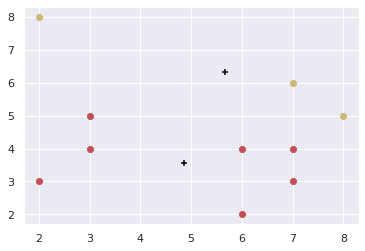

In [542]:
kmeans = KMeans(n_clusters=2, init_centroids=[[3, 2], [4, 8]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

scatter(clusters, centroid_centers)

Task 2:

In [543]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-03-15 04:27:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.13’

iris.data.13        100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-03-15 04:27:48 (145 MB/s) - ‘iris.data.13’ saved [4551/4551]



In [544]:
id = loadCSV('iris.data')

In [545]:
iris_data = []
del id[-1]

for row in raw_iris_data:
  iris_data.append([
    row[0],
    row[1],
    row[2],
    row[3],
    row[4]
  ])

print(iris_data)

[[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 

In [546]:
target_labels = dict(label_cluster(iris_data))

Questions 1,2,3:

Time taken: 0.007506132125854492
Number of iterations: 7


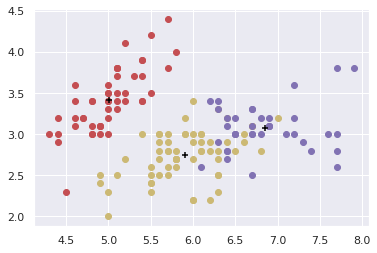

SSE = [218.29506744328202, 155.0916198748848, 115.90778245467753, 104.56644763755908, 98.7779016487441, 97.59007956128406, 97.17547683463661]
Previous Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 48, 'Iris-virginica': 36}
Accuracy = 0.8926174496644296


In [547]:
kmeans = KMeans()
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Previous Labels: ", target_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in target_labels:
  total += target_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Time taken: 0.06646275520324707
Number of iterations: 5


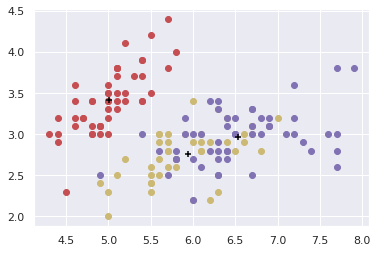

SSE = [124.96919183759981, 120.22772640811053, 111.90117681755133, 104.801516150989, 101.42234214063515]
Previous Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 46, 'Iris-virginica': 50}
Accuracy = 0.9731543624161074


In [548]:
kmeans = KMeans(d_func=cosine)
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Previous Labels: ", target_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in target_labels:
  total += target_labels[l]
  mismatch += abs(target_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Time taken: 0.05327320098876953
Number of iterations: 4


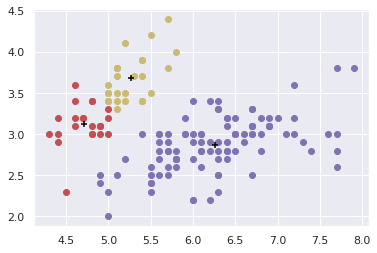

SSE = [122.38190181207545, 121.35668666135413, 121.27836278221008, 121.259693322016]
Previous Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 26, 'Iris-versicolor': 50, 'Iris-virginica': 0}
Accuracy = 0.5100671140939598


In [549]:
kmeans = KMeans(d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Previous Labels: ", target_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in target_labels:
  total += target_labels[l]
  mismatch += abs(target_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Question 4:

1st Stopping Criteria: No Change in Centroids

In [550]:
kmeans = KMeans(centroid_stop=True)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.008604764938354492
Number of iterations: 3
[119.50736593535548, 97.74290758700509, 97.19577229449335]


In [551]:
kmeans = KMeans(centroid_stop=True, d_func=cosine)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.07162117958068848
Number of iterations: 5
[222.33920465251285, 118.94605550734212, 108.21101650276748, 102.72885630947424, 101.42234214063515]


In [552]:
kmeans = KMeans(centroid_stop=True, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.06343770027160645
Number of iterations: 4
[99.49840366780184, 98.773416323733, 98.19480054362994, 98.19939498657202]


# Stopping Criteria: Increase in SSE

In [553]:
kmeans = KMeans(show_sse=True)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.011047124862670898
Number of iterations: 5
[147.1897998310636, 102.70413033642377, 97.77751316167583, 97.30122458977715, 97.17547683463661]


In [554]:
kmeans = KMeans(show_sse=True, d_func=cosine)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.04484748840332031
Number of iterations: 4
[121.34997396554357, 110.19313133172061, 104.93942770413, 102.26916147701174]


In [555]:
kmeans = KMeans(show_sse=True, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.07265806198120117
Number of iterations: 4
[189.65998566954633, 111.63290264877325, 98.08897218572542]


## Stopping_Criteria: Max Iterations



Euclidean:

In [556]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.1174166202545166
Number of iterations: 100
[98.2766669262152, 97.72294682415851, 97.60402359368427, 97.44003154969444, 97.29936922961471, 97.19423615901931, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.195772294

Cosine Similarity:

In [557]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False, d_func=cosine)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.7951977252960205
Number of iterations: 100
[110.57442895308003, 103.72737076336821, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 101.42234214063515, 10

Jaccard's Similarity:

In [558]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 1.0125701427459717
Number of iterations: 100
[123.94037749072493, 122.88743513347798, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 122.60733198574232, 12

Task 3:

In [559]:
red = [(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9)]
blue = [(5.9, 3.2), (6.7, 3.1), (6.0, 3.0), (6.2, 2.8)]

dists = []
d = 0
for r in red:
    for b in blue:
        dists.append([euclidean_distance(r, b), [r, b]])
        d += dists[-1][0]

dists.sort()

print((dists[0][0], dists[0][1][0], dists[0][1][1]))
print((dists[-1][0], dists[-1][1][0], dists[-1][1][1]))
print((d/len(dists)))

(0.9219544457292891, (5.0, 3.0), (5.9, 3.2))
(2.109502310972899, (4.6, 2.9), (6.7, 3.1))
1.4128564854895742


If even intra-cluster points' distances are considered, then